In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

In [4]:
X = np.random.randn(1000, 1)
noise = 2 * np.random.randn(1000, 1)
Y = 4 * X + 3 + noise

In [5]:
Y = np.squeeze(Y)

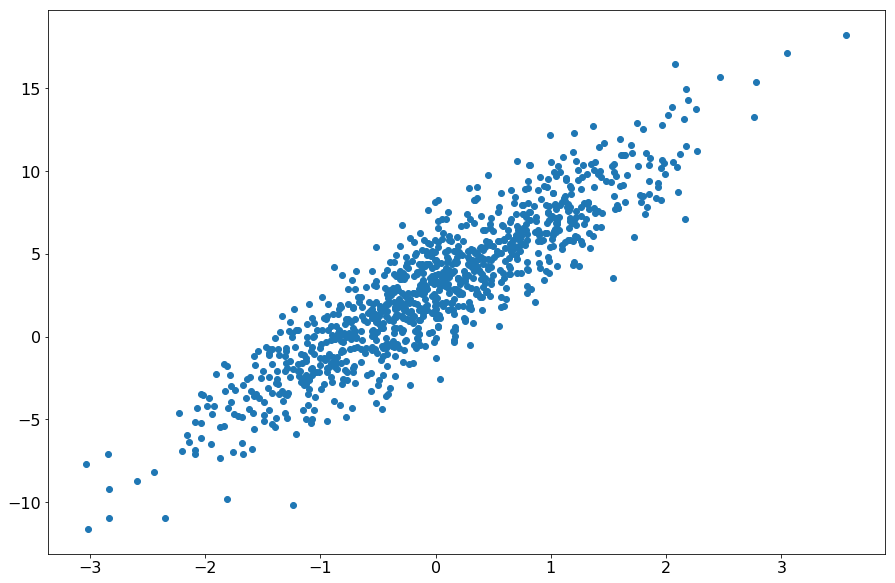

In [6]:
plt.scatter(X, Y)

In [7]:
from pymc3_models.models.LinearRegression import LinearRegression

Fit w/ ADVI
===

In [8]:
LR = LinearRegression()

In [9]:
LR.fit(X, Y, minibatch_size=100)

Average Loss = 222.64:  14%|█▎        | 27316/200000 [00:23<02:31, 1140.13it/s]
Convergence archived at 27400
Interrupted at 27,399 [13%]: Average Loss = 546.64


LinearRegression()

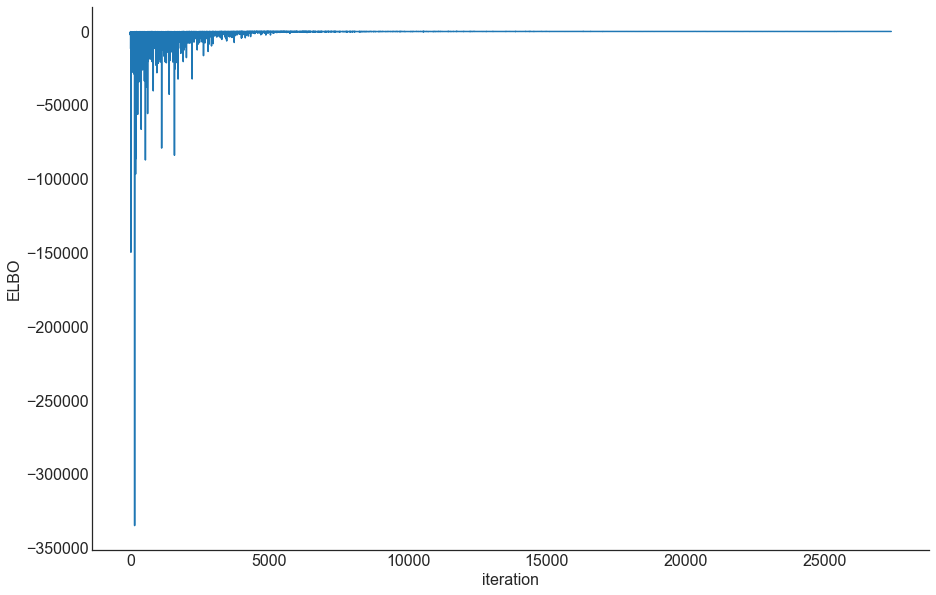

In [10]:
LR.plot_elbo()

In [11]:
Y_predict = LR.predict(X)

100%|██████████| 2000/2000 [00:00<00:00, 2144.13it/s]


In [12]:
LR.score(X, np.squeeze(Y))

100%|██████████| 2000/2000 [00:00<00:00, 2367.54it/s]


0.81415287825943672

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c6a9be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e5d5ba8>]], dtype=object)

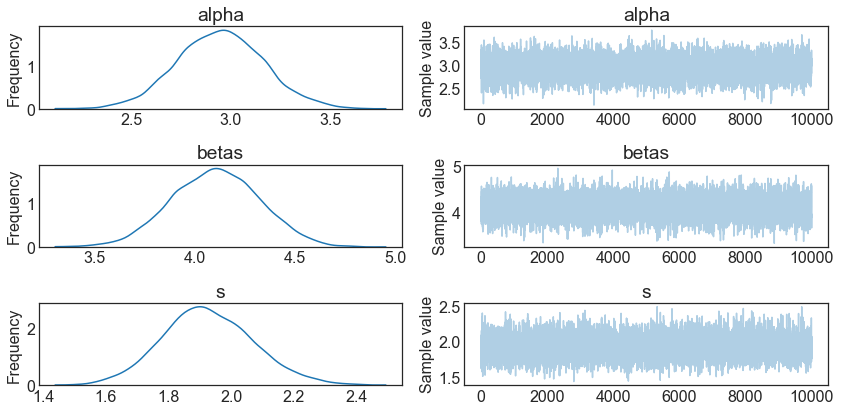

In [21]:
traceplot(LR.trace)

In [13]:
#LR.cached_model

In [14]:
# with LR.cached_model:
#     a = LR.approx.sample_node('alpha')

In [15]:
# max_x = max(X)
# min_x = min(X)

# m = LR.coef_[0][0]
# b = LR.intercept_[0]
# fig1 = plt.figure()
# #ax = fig.add_subplot(111)
# plt.scatter(X, Y)
# plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r')

Fit w/ NUTS
===

In [16]:
LR2 = LinearRegression()

In [17]:
LR2.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

setting shared vars


100%|██████████| 2500/2500 [00:02<00:00, 1054.40it/s]


LinearRegression()

In [18]:
LR2.score(X, Y)

100%|██████████| 2000/2000 [00:01<00:00, 1629.48it/s]


0.81411623973048086

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e863470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e95acc0>]], dtype=object)

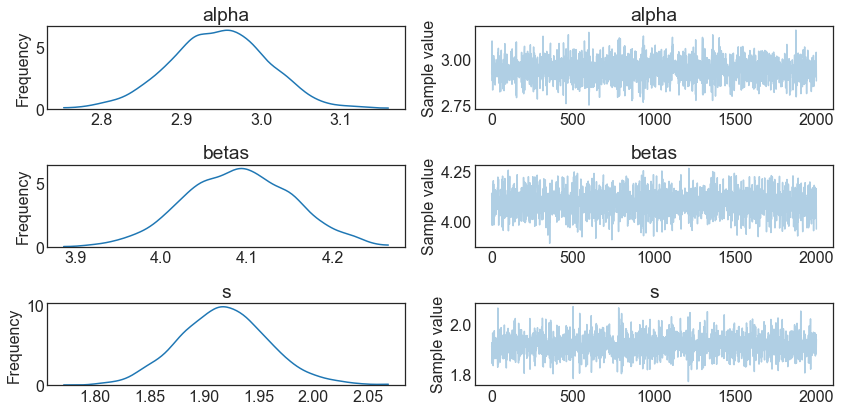

In [20]:
traceplot(LR2.trace)